# Anomaly Detection
- finding unsual events in data
- out of spec parts in industry
- fraud detection
- pre-emptive fault detection e.g. data center monitoring

### Density Estimation

Training Set: $[ x^{(1)}, x^{(1)}, \dots , x^{(m)} ] $

Each $x^{(i)}$ has $n$ features

Compound probablity of all features,

$p(x) = p(x_1;\mu_1, \sigma_1^2) p(x_2;\mu_2, \sigma_2^2) \cdots p(x_n;\mu_n, \sigma_n^2)$

Or simply

$p(x) = \prod_{j=1}^{n} p(x_j;\mu_j, \sigma_j^2)$

#### Gaussian Distribution
$p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

$\mu$ = mean

$\sigma$=standard deviation

$\sigma^2$ = variance


### Detection Algorithm

1. Training set $x^{(1)}, x^{(2)}, \dots, x^{(m)}$.
2. Fit parameters 

$ \mu_1, \sigma_1^2, \dots , \mu_n, \sigma_n^2$

2. Estimate probability density for new sample  $x^{(i)}$ for $n$ features.

$p(x) = \prod_{j=1}^{n} p(x_j;\mu_j, \sigma_j^2)$

3. Predict,

Anamolous, $y = 1$ when $p(x) < \epsilon$

Non-anomolous, $y = 0$ when $p(x) \geq \epsilon$


### Algorithm Evaluation and $\epsilon$ tuning
1. Fit model $p(x)$ on training set $x^{(1)}, x^{(2)}, \dots, x^{(m)}$.
2. On a dev set example $x$ predict, 

$y = 1$ when $p(x) < \epsilon$

$y = 0$ when $p(x) \geq \epsilon$

3. Use Precision/Recall or $F_1$ score parameters to evaluate and tune $\epsilon$.

### Anomany Detection (previously unseen way) vs Supervised Learning (known ways)
| Anomaly Detection | Supervised Learning |
| ----------------- | ------------------- |
| Fraud detection, previously unknown ways to commit fraud | Email spam classification, new spam emails are similar to previous |
|Manufacturing: detection previously unseen defects| Detect previously known defects|
|Monitoring data center machines for unusual behaviour| Disease classification|

### Choosing features and tuning - practical advice

#### Convert Non-gaussian feature to Gaussian with mathematical transform
- transform to make it more gaussian like e.g. 

$x_1 \rightarrow \log(x_1 + c)$ as new feature

$x_1 \rightarrow \sqrt{x_1 + 1}$ as new feature

#### Feature engineering for increasing gap between $p(x)$ for anomaly and normal examples

Ideally we want $p(x)$ large for normal examples and $p(x)$ small for anomalous examples. But many times $p(x)$ is comparable for both types. 

Create a new feature that increases the gap between the two.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

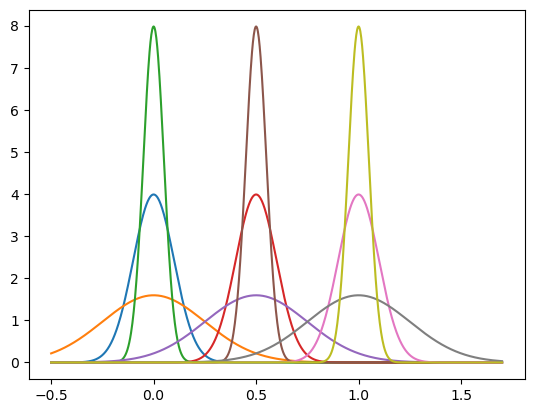

In [27]:
def gaussian(x, mean=0, std=0.5):
    return (1/(std*np.sqrt(2*np.pi)))*np.exp(-(x-mean)**2/(2*std**2))

x = np.linspace(-0.5,1.7,1000)
means = [0, 0.5, 1]
stds = [0.1, 0.25, 0.05]
for mean in means:
    for std in stds:
        plt.plot(x, gaussian(x, mean, std))

